<a href="https://colab.research.google.com/github/AdrianaPugarito/DeeplearningCurso/blob/main/Ocean_DeepLearning_13_08_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow
# Keras
# Redes Neurais

# Glossário de Python

# Exibir informações
print("Hello, world!")

# Declarar uma variável
numero = 20
print(numero, type(numero))

# Trabalhar com listas e exibir tipo das informações
lista = [10, 20, 30]
print(lista, type(lista))

# Pegar elementos da lista
elemento_da_lista = lista[0]
print(elemento_da_lista, type(elemento_da_lista))

# Mudar elementos da lista
lista[1] = 99
print(lista, type(lista), type(lista[1]))

# Quantidade de elementos da lista
quantidade_elementos = len(lista)

# Tupla
tupla = (51, 62, 79)
print(tupla, type(tupla))

tupla2 = 99, 11, 13
print(tupla2, type(tupla2))

tupla3 = 10, 5
print(tupla3, type(tupla3))

# Acessando elementos da tupla
elemento_da_tupla = tupla[0]
print(elemento_da_tupla, type(elemento_da_tupla))

# Tupla vs Lista?
# Tuplas não podem ser modificadas
# TypeError: 'tuple' object does not support item assignment
# tupla[0] = 30

# Atalho para comentar: Ctrl + /

tupla4 = 9, 6, 3, 2
print(tupla4, type(tupla4))

"""
tupla4_em_lista = list(tupla4)
tupla4_em_lista[0] = 99
tupla4_lista_em_tupla_novamente = tuple(tupla4_em_lista)
print(tupla4_lista_em_tupla_novamente, type(tupla4_lista_em_tupla_novamente))

# Comentários de uma linha
"""


Hello, world!
20 <class 'int'>
[10, 20, 30] <class 'list'>
10 <class 'int'>
[10, 99, 30] <class 'list'> <class 'int'>
(51, 62, 79) <class 'tuple'>
(99, 11, 13) <class 'tuple'>
(10, 5) <class 'tuple'>
51 <class 'int'>
(9, 6, 3, 2) <class 'tuple'>


'\ntupla4_em_lista = list(tupla4)\ntupla4_em_lista[0] = 99\ntupla4_lista_em_tupla_novamente = tuple(tupla4_em_lista)\nprint(tupla4_lista_em_tupla_novamente, type(tupla4_lista_em_tupla_novamente))\n\n# Comentários de uma linha\n'

In [ ]:
nome = "Adriana Pugarito"

contador = 0

In [ ]:
# Nova célula

print(nome)

contador = + 1
print(f"Esse nome foi exibido{contador} vez(es)!")

Adriana Pugarito
Esse nome foi exibido1 vez(es)!


In [ ]:
# Importar Tensorflow, Keras e todas as ferramentas/bibliotecas que precisamos!

from tensorflow import keras # Importa a biblioteca Keras

from keras.datasets import mnist # Base de Dados MNIST - 60k imagens treino, 10k imagens teste

from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [ ]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# X_Treino -> 60k imagens, 28x28 pixels
# Y_Treino -> 60k labels, contendo o número que está desenhado na imagem

# X_Teste -> 10k imagens, 28x28 pixels
# Y_Teste -> 10k labels, contendo o número que está desenhado na imagem

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 de treino representa?", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 de treino representa? 5
Formato da primeira imagem: (28, 28) <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253

A imagem representa: 5


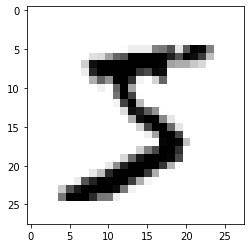

In [ ]:
import matplotlib.pyplot as plt

indice = 0

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [ ]:
# Fluxo para construção da rede neural

# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões

In [ ]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)

x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [ ]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como será que ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [ ]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0


In [ ]:
# Normalização de dados

# Conversão para tipos

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255 # Divide todos os 60000 valores de x_treino por 255 e armazena esse resultado em x_treino
x_teste /= 255 # Divide todos os 10000 valores de x_teste por 255 e armazena esse resultado em x_teste

In [ ]:
# Como está o pixel 350 da primeira imagem de x_treino?
print(x_treino[0][350], type(x_treino[0][350]))

# Como está x_treino[0] agora?
print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [ ]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0


In [ ]:
# Normalização de dados

# Conversão para tipos

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255 # Divide todos os 60000 valores de x_treino por 255 e armazena esse resultado em x_treino
x_teste /= 255 # Divide todos os 10000 valores de x_teste por 255 e armazena esse resultado em x_teste

In [ ]:
# Como está o pixel 350 da primeira imagem de x_treino?
print(x_treino[0][350], type(x_treino[0][350]))

# Como está x_treino[0] agora?
print(x_treino[0])

0.0010765091 <class 'numpy.float32'>
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+

In [ ]:
# Preparação da camada de saída

# Quais são as possibilidades de saída? Números de 0 a 9
# Atualmente, nas labels, temos: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# Transformaremos para o formato da camada de saída: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Sendo que cada número possui valor 1 na posição que corresponde a esse número
# Exemplo:
# Número 5 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# Número 9 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# Número 0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print("Primeiro elemento:", y_treino[0], type(y_treino[0]))

valores_unicos = set(y_treino)

print("Valores únicos:", valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10

# Transformação de valores inteiros em valores categóricos

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

Primeiro elemento: 5 <class 'numpy.uint8'>
Valores únicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Prever os resultados é transformar os valores categórios em um número equivalente
# Exemplo:
# [0         1     2        3     4     5       6     7        8     9 ]
# [0.11.     0.    0.22.    0.    0.    0.9.    0.    0.36.    0.    0.]
# Significa que a rede está prevendo que a aquela imagem (matriz de pixels) representa um número 5

In [ ]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação
# Como estamos na primeira hidden layer, precisamos definir o input shape

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting
# Overfitting = quando a rede aprender a resolver aquela base específica, mas não
# abstrai o problema de forma suficiente para resolver imagens que ela não conhece

model.add(Dropout(0.2))

# Segunda hidden layer
# 20 neurônios
# Função de ativação: ReLU

model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer

model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output)
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibimos o resumo do modelo criado

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compila e treina o modelo
# Definimos a função de erro
# Definimos o otimizador
# Definimos a métrica de aprendizado

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treinamos o modelo

# Imagens em treino, labels em treino
# batch_size = Tamanho do batch (recomendado potência de 2)
# epochs = Quantas épocas irei treinar
# verbose = Exibe o treinamento
# Imagens em teste, labels em teste

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.9985 - accuracy: 0.3407 - val_loss: 1.5187 - val_accuracy: 0.4801
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 1.3525 - accuracy: 0.5067 - val_loss: 1.0386 - val_accuracy: 0.6704
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 1.0728 - accuracy: 0.6125 - val_loss: 0.8493 - val_accuracy: 0.7323
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.9441 - accuracy: 0.6721 - val_loss: 0.7499 - val_accuracy: 0.7714
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8605 - accuracy: 0.7128 - val_loss: 0.6743 - val_accuracy: 0.8039
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7950 - accuracy: 0.7424 - val_loss: 0.6052 - val_accuracy: 0.8283
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7393 - accuracy: 0.7659 - val_loss: 0.5478 - val_accuracy: 0.8497
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Previsão: [[1.1729946e-03 1.4937292e-07 7.9213351e-06 2.6157466e-03 1.7433704e-04
  1.9794673e-02 6.9154231e-07 9.5453966e-01 5.5577589e-04 2.1138180e-02]]
Previsão ajustada: [7]



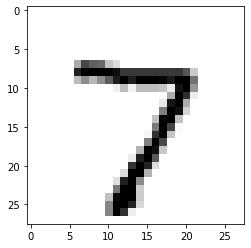

In [24]:
# Fazendo novas previsões

indice = 0

print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Preparo a imagem para fazer a previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

print()

# Faço a previsão
prediction = model.predict(imagem)
print("Previsão:", prediction)

# Traduzindo a previsão em algo mais legível
import numpy as np
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada:", prediction_class)

print()

# Carregar os dados originais novamente para exibir como imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)